Всего анкет:  6816
32.101672535211264
Анкет длиной хотя бы 15 слов 4265


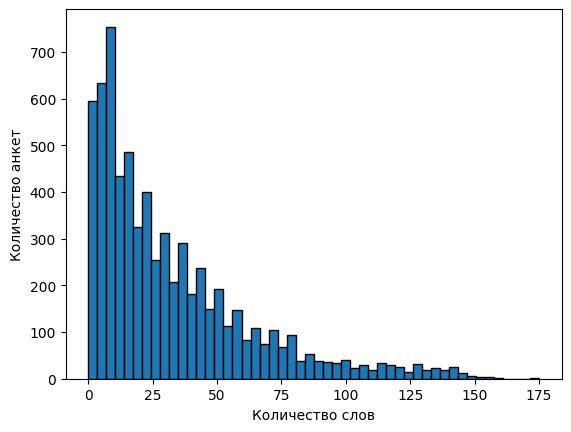

In [ ]:
import json
import matplotlib.pyplot as plt


with open('profiles.json', 'r') as file:
    profiles_dict = json.load(file)

profiles = profiles_dict['profiles']
print("Всего анкет: ", len(profiles))
ages = []
cities = []
texts = []
for profile in profiles:
  pre, text = profile.split("–", maxsplit=1)
  try:
      _, age, city = pre.split(",")[:3]
      ages.append(int(age))
      cities.append(city.strip().lower())
      texts.append(text)
  except:
      pass

MIN_WORDS = 15
lens = [len(profile.split()) for profile in texts]
print(sum(lens)/len(profiles))
texts = [profile for profile in texts if len(profile.split()) >= MIN_WORDS]
print(f"Анкет длиной хотя бы {MIN_WORDS} слов", len(texts))

plt.hist(lens, bins=50, edgecolor='black')
plt.xlabel('Количество слов')
plt.ylabel('Количество анкет')
plt.show()

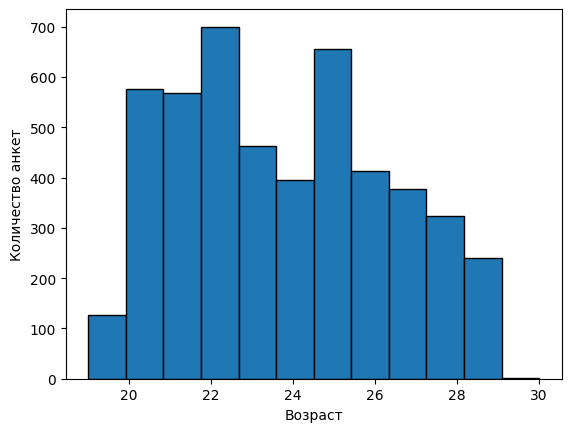

In [ ]:
plt.hist(ages, bins=12, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество анкет')
plt.show()

In [ ]:
cities_names = [
    ['Екатеринбург', 'екатеринбург', 'ekaterinburg', 'екатиренбург'],
    ['Санкт-Петербург', 'spb', 'санкт', 'петербург', 'спб', 'питер'],
    ['Казань', 'казань'],
    ['Нижний Новгород', 'новгород'],
    ['Новосибирск', 'новосибирск']
]
other = set()
for i in range(len(cities)):
    found = False
    for city_names in cities_names:
        for el in city_names:
            if el in cities[i]:
                cities[i] = city_names[0]
                found = True
                break
    if not found:
        other.add(cities[i])
        cities[i] = 'Москва'


In [ ]:
print(set(cities))

{'Екатеринбург', 'Нижний Новгород', 'Санкт-Петербург', 'Новосибирск', 'Москва', 'Казань'}


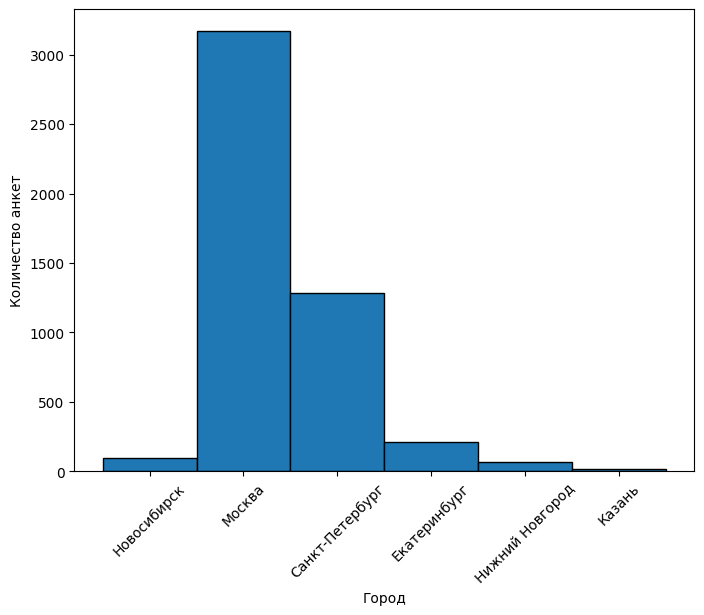

In [ ]:
import numpy as np

plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(cities, bins=6, edgecolor='black')
plt.xticks(bins[:-1] + np.diff(bins) / 2)
plt.xticks(rotation=45)
plt.xlabel('Город')
plt.ylabel('Количество анкет')
plt.show()

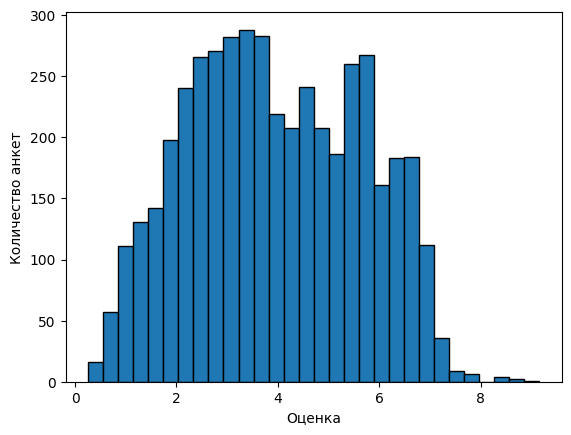

In [ ]:
import json
import matplotlib.pyplot as plt

with open('dataset.json', 'r') as file:
    data = json.load(file)

scored_profiles = data["data"]
scores = [profile["score"] for profile in scored_profiles]
plt.hist(scores, bins=30, edgecolor='black')
plt.xlabel('Оценка')
plt.ylabel('Количество анкет')
plt.show()

In [ ]:
cnt = 0
for el in scores:
    if el >= 5:
        cnt += 1
print("Количество анкет с оценкой хотя бы 5:", cnt)

Количество анкет с оценкой хотя бы 5: 1414
